<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 1</p><br>

## 1. **Extracting twitter data:** In this problem we would like to extract data from twitter.

a. **Twitter API:** Set up twitter API using any of the methods as mentioned in the class.

In [2]:
# TODO

b. Now search twitter messages for "data science job". Display few job informations.

In [3]:
# TODO

c. Search 300 tweets using the hash tag `#chess` and save them in an object called `rTweets`. Show the top 7 sources of tweets (such as android or iphone) in a ordered bar plot.

In [4]:
# TODO

d. Convert rTweets into a data frame and store it in an object called dTweets. Display some data from dTweets.

In [5]:
# TODO 

e. dTweets has a column showing the time the tweet was created. Generate a plot showing number of tweets on each of the hours.

In [6]:
# TODO

f. Arrange the dataframe dTweets based on the retweetCount. While doing this select only columns text, screenName, retweetCount. Store the data in a object called mostTweets. Display five texts that are most retweeted.

In [8]:
# TODO

g. Generate a bar chart showing top 15 screen names and count of retweets from mostTweets. Order the bars based on the retweet counts.

In [9]:
# TODO

## 2. **Working with databases:** Please follow the instruction below before answering the questions:
* Import the sqlite3
* Connect to titanic.db

a. What is the average age of passengers who survived? Group the data by Sex. Display only the column `Sex`, `AverageAge`

In [1]:
import sqlite3
import pandas as pd
connection = sqlite3.connect("titanic.db")
curs = connection.cursor()
curs.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(curs.fetchall())

[('titanic',)]


b. What is the percentage of passengers who survived in each Passenger Class or `Pclass`? Group the data by `Sex`. Display Pclass, Sex, percentage value. 

In [2]:
curs.execute("SELECT Pclass,Sex, AVG(Survived) FROM titanic GROUP BY Pclass, Sex")
curs.fetchall()

[('1', 'female', 0.967391304347826),
 ('1', 'male', 0.36885245901639346),
 ('2', 'female', 0.9210526315789473),
 ('2', 'male', 0.1574074074074074),
 ('3', 'female', 0.5),
 ('3', 'male', 0.13544668587896252)]

c. What is the average age of all the passenger (survived and not survived)? Group the data by `Pclass`, `Sex`, `Survived`. After that use `seaborn` to generate a line plot to show average age vs pclass, facet by sex and color it by survived.

In [10]:
curs.execute("SELECT Pclass,Sex,Survived, AVG(Age) FROM titanic GROUP BY Pclass, Sex ,Survived")
output = curs.fetchall()
output

[('1', 'female', '0', 25.666666666666668),
 ('1', 'female', '1', 34.5625),
 ('1', 'male', '0', 44.58196721311475),
 ('1', 'male', '1', 36.248000000000005),
 ('2', 'female', '0', 36.0),
 ('2', 'female', '1', 28.080882352941178),
 ('2', 'male', '0', 33.36904761904762),
 ('2', 'male', '1', 16.022),
 ('3', 'female', '0', 23.818181818181817),
 ('3', 'female', '1', 19.329787234042552),
 ('3', 'male', '0', 27.25581395348837),
 ('3', 'male', '1', 22.274210526315787)]

In [11]:
survived = []
sex = []
pclass = []
avg_age = []
for row in output:
    pclass.append(row[0])
    sex.append(row[1])
    survived.append(row[2])
    avg_age.append(row[3])

In [8]:
import seaborn as sns

<AxesSubplot:>

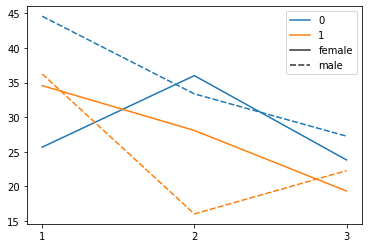

In [18]:
sns.lineplot(x = pclass  , y = avg_age , hue = survived , style= sex)

d. What is the name, age, sex and pclass of the 5 oldest and 5 youngest persons who died?

In [65]:
## AGE column type is str:

query = """ALTER TABLE titanic ADD Age_float  FLOAT"""
curs.execute(query)
connection.commit()

In [67]:
curs.execute("UPDATE titanic SET Age_float=Age")
connection.commit()

In [76]:
query = """SELECT Name , Age_float , Sex , Pclass
FROM titanic
WHERE (Age_float IS NOT NULL) & (Survived = 0)
ORDER BY Age_float DESC
limit 5
"""
curs.execute(query)
data = curs.fetchall()
print("5 oldest passengers who died: \n")

for item in data:
    print("Name:" , " ".join(item[0].split(",")[::-1]))
    print("Age:" , int(item[1]))
    print("Sex:" , item[2])
    print("P_Class:" , item[3])
    print("-"*10)


5 oldest passengers who died: 

Name:  Mr. Johan Svensson
Age: 74
Sex: male
P_Class: 3
----------
Name:  Mr. George B Goldschmidt
Age: 71
Sex: male
P_Class: 1
----------
Name:  Mr. Ramon Artagaveytia
Age: 71
Sex: male
P_Class: 1
----------
Name:  Mr. Patrick Connors
Age: 70
Sex: male
P_Class: 3
----------
Name:  Mr. Henry Michael Mitchell
Age: 70
Sex: male
P_Class: 2
----------


In [77]:
query = """SELECT Name , Age_float , Sex , Pclass
FROM titanic
WHERE (Age_float IS NOT NULL) & (Survived = 0)
ORDER BY Age_float ASC
limit 5
"""
curs.execute(query)
data = curs.fetchall()
print("5 Youngest passengers who died: \n")

for item in data:
    print("Name:" , " ".join(item[0].split(",")[::-1]))
    print("Age:" , int(item[1]))
    print("Sex:" , item[2])
    print("P_Class:" , item[3])
    print("-"*10)


5 Youngest passengers who died: 

Name:  Master. Eino Viljami Panula
Age: 1
Sex: male
P_Class: 3
----------
Name:  Master. Sidney Leonard Goodwin
Age: 1
Sex: male
P_Class: 3
----------
Name:  Master. Gosta Leonard Palsson
Age: 2
Sex: male
P_Class: 3
----------
Name:  Master. Eugene Rice
Age: 2
Sex: male
P_Class: 3
----------
Name:  Miss. Ellis Anna Maria Andersson
Age: 2
Sex: female
P_Class: 3
----------


e. On average which Passenger Class is more expensive?

In [83]:
curs.execute("SELECT Pclass , AVG(Fare) FROM titanic GROUP BY Pclass")
most_expensive = max(curs.fetchall() , key= lambda x:x[1])
print(f"The most expensive class is class {most_expensive[0]} at price ${round(most_expensive[1],1)}")

The most expensive class is class 1 at price $84.2
